# Random Forest Regressor Model
### NBA Playoff Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import copy
import warnings
warnings.simplefilter(action='ignore')

In [2]:
pd.set_option('display.max_columns', None)
ALL_SEASONS = "seasons_data.csv"
CUR_SEASON = "2023_data.csv"

### Read all data

In [3]:
# read in our csv's of data
all_df = pd.read_csv(ALL_SEASONS)
df_23 = pd.read_csv(CUR_SEASON)

# concat the data
df = pd.concat([all_df, df_23], ignore_index=True)

# drop minutes played and attendance per game
all_df.drop(['MP', 'Attend./G'], axis=1, inplace=True)
df_23.drop(['MP', 'Attend./G'], axis=1, inplace=True)

## Make model using all attributes

In [4]:
# split the data using all features
features = all_df[all_df.columns[1:-2]]
target = all_df[['Playoff']]

X = features  # get the input features
y = target  # get the target

X_train, X_test, y_train, y_test = train_test_split(X,  # the input features
                                                    y,  # the label
                                                    test_size=0.3,  # set aside 30% of the data as the test set
                                                    random_state=7  # reproduce the results
                                                     )

### Hyperparameter tuning
Determine what number of bins makes the model work best

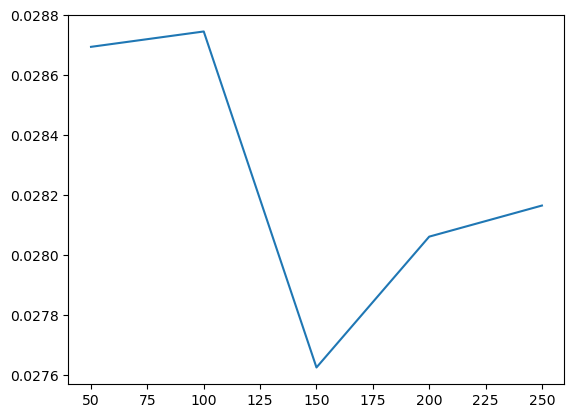

In [5]:
predictions = {}

# test n_estimators [50, 100, 150, 200, 250]
for n in range(50, 300, 50):
    # build model
    rf = RandomForestRegressor(random_state=7, n_estimators=n)
    rf.fit(X_train, y_train)
    
    #predict the labels for the test set
    y_pred   = rf.predict(X_test)
    
    # calculate mse and store 
    mse = mean_squared_error(y_test, y_pred)
    predictions[n] = mse

# Plot mse
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()      

In [6]:
# make random forest regressor model with all features
rf = RandomForestRegressor(random_state=7, n_estimators=150)
rf.fit(X_train, y_train)

# predict the labels for the test set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.027625047483380818


### Determine feature importance

In [7]:
# Determine feature importance, identify features
importances = pd.DataFrame({'stat': features.columns,
                            'value': rf.feature_importances_})
importances.sort_values('value', ascending=False, inplace=True)
importances.head()

,stat,value
33,win_perc,0.654893
14,PL,0.028755
15,MOV,0.028665
16,SOS,0.028402
20,NRtg,0.019053


## Make model using top attributes from past model

In [8]:
# split the data with top 10 features
features = all_df[importances.loc[:11, 'stat']]
target = all_df[['Playoff']]

X = features  # get the input features
y = target  # get the target

X_train, X_test, y_train, y_test = train_test_split(X,  # the input features
                                                    y,  # the label
                                                    test_size=0.3,  # set aside 30% of the data as the test set
                                                    random_state=7  # reproduce the results
                                                     )

### Hyperparameter tuning
Determine what number of bins makes the model work best

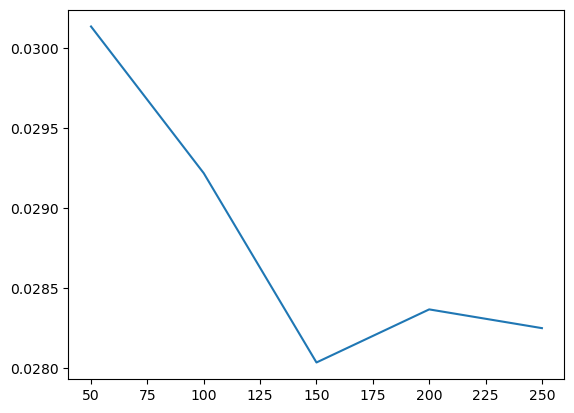

In [9]:
predictions = {}

# test n_estimators [50, 100, 150, 200, 250]
for n in range(50, 300, 50):
    # build model
    rf = RandomForestRegressor(random_state=7, n_estimators=n)
    rf.fit(X_train, y_train)
    
    #predict the labels for the test set
    y_pred   = rf.predict(X_test)
    
    # calculate mse and store 
    mse = mean_squared_error(y_test, y_pred)
    predictions[n] = mse

# Plot mse
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()    

In [10]:
# make random forest regressor model with top 10 features
rf = RandomForestRegressor(random_state=7, n_estimators=150)
rf.fit(X_train, y_train)

# predict the labels for the test set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.028033072174738837


### Results
This model performs slightly worse than the model using all the attributes (higher MSE).

## Use better model to predict outcome of current teams

In [11]:
# split the data using all features
features = all_df[all_df.columns[1:-2]]
target = all_df[['Playoff']]

X = features  # get the input features
y = target  # get the target

X_train, X_test, y_train, y_test = train_test_split(X,  # the input features
                                                    y,  # the label
                                                    test_size=0.3,  # set aside 30% of the data as the test set
                                                    random_state=7  # reproduce the results
                                                     )

In [12]:
# make random forest regressor model with all features
rf = RandomForestRegressor(random_state=7, n_estimators=150)
rf.fit(X_train, y_train)

# predict the labels for the 2023 teams
df_23_new = copy.deepcopy(df_23)
teams = df_23.loc[:, 'Team']

df_23_new.drop(['Team', 'Year'], axis=1, inplace=True)
y_pred = rf.predict(df_23_new)

In [13]:
# match outcome with team, place in descending order
outcome = pd.DataFrame({'Team': teams,
                        'Playoff': y_pred})
outcome.sort_values('Playoff', ascending=False, inplace=True, ignore_index=True)
outcome

,Team,Playoff
0,Milwaukee Bucks,0.703333
1,Denver Nuggets,0.701667
2,Boston Celtics,0.675000
3,Philadelphia 76ers,0.633333
4,Cleveland Cavaliers,0.631667
5,Memphis Grizzlies,0.540000
6,Sacramento Kings,0.516667
7,Los Angeles Clippers,0.356667
8,Brooklyn Nets,0.350000
9,New York Knicks,0.325000
